In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [13]:
import pickle 

# # Đọc dữ liệu bệnh tim, phân loại nhị phân
# with open('preprocessing/heart/X.pkl', 'rb') as f:
#     X = pickle.load(f)
# with open('preprocessing/heart/y.pkl', 'rb') as f:
#     y = pickle.load(f)

# Đọc dữ liệu thuốc điều trị, phân loại nhiều lớp
with open('preprocessing/drug/X.pkl', 'rb') as f:
    X = pickle.load(f)
with open('preprocessing/drug/y.pkl', 'rb') as f:
    y = pickle.load(f)

print('So luong du lieu: ', len(X))
print('So luong nhan: ', len(y))
X[0:5]

So luong du lieu:  200
So luong nhan:  200


array([[0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.54237288, 1.        , 0.5       , 0.        , 0.21339671],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.22033898, 0.        , 1.        , 0.        , 0.04781412],
       [0.77966102, 0.        , 0.5       , 0.        , 0.36819063]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=10)

In [15]:
X_train

array([[0.84745763, 1.        , 0.        , 1.        , 0.15857777],
       [0.57627119, 1.        , 0.        , 1.        , 0.        ],
       [0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.44067797, 0.        , 1.        , 1.        , 0.52023266],
       [0.18644068, 0.        , 0.        , 1.        , 0.18881731],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.54237288, 0.        , 0.5       , 0.        , 0.11876915],
       [0.96610169, 0.        , 0.5       , 1.        , 0.26183626],
       [0.89830508, 0.        , 1.        , 1.        , 0.64985302],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.74576271, 0.        , 1.        , 0.        , 0.23813247],
       [0.6440678 , 1.        , 1.        , 0.        , 0.24591907],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.        , 1.        , 1.        , 0.        , 0.08802927],
       [0.57627119, 0.        , 1.

In [16]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

In [17]:
class KNN:
    def __init__(self, top_k=5):
        self.top_k = top_k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    @staticmethod
    def distance(x1, x2):
        return np.linalg.norm(x1 - x2)

    def predict_batch(self, X):
        y_pred = [self.predict(x) for x in X]
        return y_pred

    def predict(self, x):
        # Compute distance to all points in train set
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        # Sort the distance with index
        top_idx = np.argsort(distances)[:self.top_k]
        # Get top K label
        k_nearests = self.y_train[top_idx]
        # Predict the label
        label = Counter(k_nearests).most_common(1)[0][0]
        
        return label

In [18]:
X_train1 = np.array(X_train)
X_train1

array([[0.84745763, 1.        , 0.        , 1.        , 0.15857777],
       [0.57627119, 1.        , 0.        , 1.        , 0.        ],
       [0.79661017, 1.        , 1.        , 0.        , 0.32287823],
       [0.44067797, 0.        , 1.        , 1.        , 0.52023266],
       [0.18644068, 0.        , 0.        , 1.        , 0.18881731],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.54237288, 0.        , 0.5       , 0.        , 0.11876915],
       [0.96610169, 0.        , 0.5       , 1.        , 0.26183626],
       [0.89830508, 0.        , 1.        , 1.        , 0.64985302],
       [0.84745763, 0.        , 0.5       , 1.        , 0.23453624],
       [0.74576271, 0.        , 1.        , 0.        , 0.23813247],
       [0.6440678 , 1.        , 1.        , 0.        , 0.24591907],
       [0.3559322 , 1.        , 0.5       , 1.        , 0.16120458],
       [0.        , 1.        , 1.        , 0.        , 0.08802927],
       [0.57627119, 0.        , 1.

100%|██████████| 6/6 [00:00<00:00, 11.23it/s]


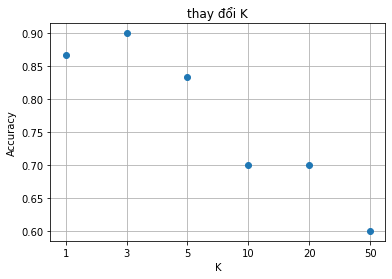

In [19]:
title = "thay đổi K"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Load model
    model = KNN(top_k = k)
    model.fit(np.array(X_train), np.array(y_train))

    # Sample predict model
    y_pred = model.predict_batch(np.array(X_test))

    # Caculate accuracy score
    acc = accuracy_score(y_pred, np.array(y_test))

    X.append(str(k))
    Y.append(acc)
    error.append(0)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
# plt.savefig('images/KNN_change_K.png', bbox_inches='tight')
plt.show()

In [20]:
# Test mô hình với K=5, cho độ chính xác cao nhất
model = KNN(top_k = 3)

model.fit(np.array(X_train), np.array(y_train))

# Sample predict model
y_pred = model.predict_batch(np.array(X_test))

# Caculate accuracy score
acc = accuracy_score(y_pred, np.array(y_test))

acc

0.9

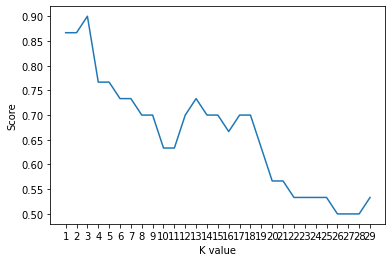

Maximum KNN Score is 90.00%


In [21]:
# try ro find best k value với thư viện KNeighborsClassifier
scoreList = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

KNN: 0.9


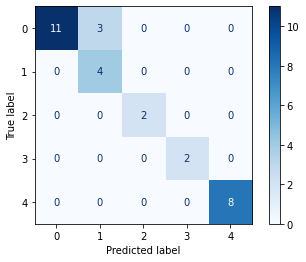

<Figure size 864x864 with 0 Axes>

In [22]:
# Test với bộ tham số tốt nhất
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn.predict(X_test))}')
# Hiển thị confusion matrix

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

In [23]:
# Generating classification report
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         8

    accuracy                           0.90        30
   macro avg       0.91      0.96      0.92        30
weighted avg       0.94      0.90      0.91        30



In [17]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, knn.predict(X_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.8333333333333334
Tỉ lệ dự đoán đúng người không bị bệnh là 0.9130434782608695
